<a href="https://colab.research.google.com/github/mrdbourke/pytorch-deep-learning/blob/main/extras/exercises/03_pytorch_computer_vision_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 03. PyTorch Computer Vision Exercises

The following is a collection of exercises based on computer vision fundamentals in PyTorch.

They're a bunch of fun.

You're going to get to write plenty of code!

## Resources

1. These exercises are based on [notebook 03 of the Learn PyTorch for Deep Learning course](https://www.learnpytorch.io/03_pytorch_computer_vision/). 
2. See a live [walkthrough of the solutions (errors and all) on YouTube](https://youtu.be/_PibmqpEyhA). 
  * **Note:** Going through these exercises took me just over 3 hours of solid coding, so you should expect around the same.
3. See [other solutions on the course GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions).

In [3]:
# Check for GPU
!nvidia-smi

Thu Nov 21 18:31:14 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 555.42.06              Driver Version: 555.42.06      CUDA Version: 12.5     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 4060 Ti     Off |   00000000:01:00.0  On |                  N/A |
|  0%   38C    P8              8W /  160W |     579MiB /   8188MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [4]:
# Import torch
import torch

# Exercises require PyTorch > 1.10.0
print(torch.__version__)

# TODO: Setup device agnostic code
if torch.cuda.is_available():
    device = torch.device('cuda')
elif torch.backends.mps.is_available():
    device = torch.device('mps')
else:
    device = torch.device('cpu')
device

2.4.0


device(type='cuda')

## 1. What are 3 areas in industry where computer vision is currently being used?

## 2. Search "what is overfitting in machine learning" and write down a sentence about what you find. 

## 3. Search "ways to prevent overfitting in machine learning", write down 3 of the things you find and a sentence about each. 
> **Note:** there are lots of these, so don't worry too much about all of them, just pick 3 and start with those.

## 4. Spend 20-minutes reading and clicking through the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/).

* Upload your own example image using the "upload" button on the website and see what happens in each layer of a CNN as your image passes through it.

## 5. Load the [`torchvision.datasets.MNIST()`](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST) train and test datasets.

In [5]:
import torch
from torch import nn

# Import torchvision
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

# print(f"Pytorch version: {torch.__version__}\ntorchvision version: {torchvision.__version__}")

train_dataset = datasets.MNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

test_dataset = datasets.MNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

## 6. Visualize at least 5 different samples of the MNIST training dataset.

torch.Size([1, 28, 28])


Text(0.5, 1.0, '5')

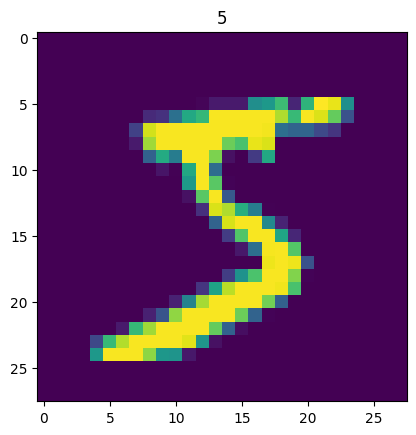

In [6]:
import matplotlib.pyplot as plt

image, label = train_dataset[0]

print(image.shape)
plt.imshow(image.squeeze())
plt.title(label)

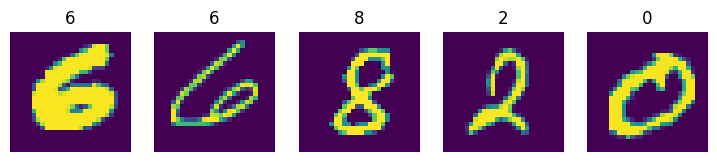

In [7]:
torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))
rows, cols = 1, 5
for i in range(1, rows * cols + 1):
    random_idx = torch.randint(0, len(train_dataset), size=[1]).item()
    img, label = train_dataset[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze())
    plt.title(label)
    plt.axis(False)

## 7. Turn the MNIST train and test datasets into dataloaders using `torch.utils.data.DataLoader`, set the `batch_size=32`.

In [8]:
from torch.utils.data import DataLoader


BATCH_SIZE = 32

train_dataloader = DataLoader(
    dataset=train_dataset,
    batch_size=BATCH_SIZE,
    shuffle=False
)

test_dataloader = DataLoader(
    dataset=test_dataset,
    batch_size=BATCH_SIZE,
    shuffle=False
)

print(f"Dataloaders: {train_dataloader, test_dataloader}")
print(f"Length of train dataloader: {len(train_dataloader)}, batches of {BATCH_SIZE}")
print(f"Length of test dataloader: {len(test_dataloader)}, batches of {BATCH_SIZE}")

Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x776a54505f70>, <torch.utils.data.dataloader.DataLoader object at 0x776a549dec00>)
Length of train dataloader: 1875, batches of 32
Length of test dataloader: 313, batches of 32


## 8. Recreate `model_2` used in notebook 03 (the same model from the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/), also known as TinyVGG) capable of fitting on the MNIST dataset.

In [9]:
train_dataset.classes

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

In [10]:
class TinyVGG(nn.Module):
    def __init__(self, input_shape, hidden_units, output_shape) -> None:
        super().__init__()
        self.block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape, 
                      out_channels=hidden_units, 
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units, 
                      out_channels=hidden_units, 
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.block_2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, 3, 1, 1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*7*7,
                      out_features=output_shape)
        )
    def forward(self, x: torch.Tensor):
        x = self.block_1(x)
        x = self.block_2(x)
        x = self.classifier(x)
        return x

torch.manual_seed(42)

class_names = train_dataset.classes
model_0 = TinyVGG(input_shape=1,
                  hidden_units=10,
                  output_shape=len(class_names))
model_0

TinyVGG(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [11]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_0.parameters(),
                            lr=0.1)

## 9. Train the model you built in exercise 8. for 5 epochs on CPU and GPU and see how long it takes on each.

In [12]:
def train_step(model: nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn,
               optimizer,
               accuracy_fn,
               device: torch.device = device):

    train_loss, train_acc = 0, 0
    model.to(device)
    for batch, (X, y) in enumerate(data_loader):
        # Send data to device
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X)
        
        # Calculate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss
        train_acc += accuracy_fn(y, y_pred.argmax(dim=1))

        # Back propagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    print(f"Train loss: {train_loss} | Train accuracy: {train_acc}")

def test_step(model: nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn,
              optimizer,
              accuracy_fn,
              device: torch.device = device):
    test_loss, test_acc = 0, 0
    model.to(device)
    model.eval()
    # Turn on inference context manager
    with torch.inference_mode():
        for X, y in data_loader:
            # Send data to device
            X, y = X.to(device), y.to(device)

            # 1. Forward pass
            y_pred_test = model(X)
            
            # 2. Calculate loss and accuracy
            loss_test = loss_fn(y_pred_test, y)
            test_loss += loss_test
            test_acc += accuracy_fn(y, y_pred_test.argmax(dim=1))

        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
        print(f"Test loss: {test_loss} | Test accuracy: {test_acc}")


In [13]:
def print_train_time(start: float, end: float, device: torch.device = None):
    total_time = end - start
    print(f"Train time on {device}: {total_time:.3f} seconds")
    return total_time

In [14]:
from tqdm.auto import tqdm
from timeit import default_timer as timer
from helper_functions import accuracy_fn

## Train model on GPU
train_time_start_on_gpu = timer()

# Train step
epochs = 5

for epoch in tqdm(range(epochs)):
    print(f"Epoch:\n--------")
    train_step(model=model_0,
               data_loader=train_dataloader,
               loss_fn=loss_fn,
               optimizer=optimizer,
               accuracy_fn=accuracy_fn,
               device=device)
    test_step(model=model_0,
              data_loader=test_dataloader,
              loss_fn=loss_fn,
              optimizer=optimizer,
              accuracy_fn=accuracy_fn,
              device=device)

train_time_end_on_gpu = timer()
total_train_time_model_1 = print_train_time(start=train_time_start_on_gpu,
                                            end=train_time_end_on_gpu,
                                            device=device)

/home/octo/code/ENTER/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
  0%|          | 0/5 [00:00<?, ?it/s]

Epoch:
--------
Train loss: 0.2675827145576477 | Train accuracy: 91.245


 20%|██        | 1/5 [00:04<00:16,  4.01s/it]

Test loss: 0.08287104964256287 | Test accuracy: 97.40415335463258
Epoch:
--------
Train loss: 0.07072286307811737 | Train accuracy: 97.82833333333333


 40%|████      | 2/5 [00:07<00:11,  3.80s/it]

Test loss: 0.0673118606209755 | Test accuracy: 97.88338658146965
Epoch:
--------
Train loss: 0.055500809103250504 | Train accuracy: 98.29166666666667


 60%|██████    | 3/5 [00:11<00:07,  3.79s/it]

Test loss: 0.0564650259912014 | Test accuracy: 98.23282747603834
Epoch:
--------
Train loss: 0.04728486388921738 | Train accuracy: 98.53333333333333


 80%|████████  | 4/5 [00:15<00:03,  3.77s/it]

Test loss: 0.051818620413541794 | Test accuracy: 98.49241214057508
Epoch:
--------
Train loss: 0.041807495057582855 | Train accuracy: 98.74166666666666


100%|██████████| 5/5 [00:19<00:00,  3.83s/it]

Test loss: 0.04842067509889603 | Test accuracy: 98.48242811501598
Train time on cuda: 19.145 seconds


In [15]:
from tqdm.auto import tqdm
from timeit import default_timer as timer
from helper_functions import accuracy_fn

## Train model on GPU
train_time_start_on_cpu = timer()

# Train step
epochs = 5

for epoch in tqdm(range(epochs)):
    print(f"Epoch:\n--------")
    train_step(model=model_0,
               data_loader=train_dataloader,
               loss_fn=loss_fn,
               optimizer=optimizer,
               accuracy_fn=accuracy_fn,
               device=torch.device('cpu'))
    test_step(model=model_0,
              data_loader=test_dataloader,
              loss_fn=loss_fn,
              optimizer=optimizer,
              accuracy_fn=accuracy_fn,
              device=torch.device('cpu'))

train_time_end_on_cpu = timer()
total_train_time_model_1 = print_train_time(start=train_time_start_on_cpu,
                                            end=train_time_end_on_cpu,
                                            device=torch.device('cpu'))

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch:
--------
Train loss: 0.03778146579861641 | Train accuracy: 98.84666666666666


 20%|██        | 1/5 [00:13<00:52, 13.15s/it]

Test loss: 0.04783172905445099 | Test accuracy: 98.5123801916933
Epoch:
--------
Train loss: 0.03502195328474045 | Train accuracy: 98.92833333333333


 40%|████      | 2/5 [00:25<00:38, 12.75s/it]

Test loss: 0.04872491583228111 | Test accuracy: 98.5223642172524
Epoch:
--------
Train loss: 0.031941574066877365 | Train accuracy: 99.02333333333333


 60%|██████    | 3/5 [00:37<00:24, 12.48s/it]

Test loss: 0.051020801067352295 | Test accuracy: 98.43250798722045
Epoch:
--------
Train loss: 0.029391689226031303 | Train accuracy: 99.08833333333334


 80%|████████  | 4/5 [00:50<00:12, 12.75s/it]

Test loss: 0.052899204194545746 | Test accuracy: 98.26277955271566
Epoch:
--------
Train loss: 0.02685440517961979 | Train accuracy: 99.17166666666667


100%|██████████| 5/5 [01:03<00:00, 12.77s/it]

Test loss: 0.04528293386101723 | Test accuracy: 98.39257188498402
Train time on cpu: 63.865 seconds


In [16]:
def eval_model(model: nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn,
               optimizer,
               accuracy_fn,
               device: torch.device = device):
    
    loss, acc = 0, 0
    model.to(device)
    model.eval()
    # Turn on inference context manager
    with torch.inference_mode():
        for X, y in data_loader:
            # Send data to device
            X, y = X.to(device), y.to(device)

            # 1. Forward pass
            y_pred = model(X)
            
            # 2. Calculate loss and accuracy
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y, y_pred.argmax(dim=1))
        
        loss /= len(data_loader)
        acc /= len(data_loader)
    
    return {"model_name": model.__class__.__name__,
            "model_loss": loss.item(),
            "model_acc": acc}

model_0_results = eval_model(model=model_0,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn,
                             optimizer=optimizer,
                             device=device)
model_0_results

{'model_name': 'TinyVGG',
 'model_loss': 0.04528294503688812,
 'model_acc': 98.39257188498402}

## 10. Make predictions using your trained model and visualize at least 5 of them comparing the prediciton to the target label.

In [17]:
def make_predictions(model:nn.Module,
                     data: list,
                     device: torch.device = device):
    pred_probs = []
    model.eval()
    with torch.inference_mode():
        for sample in data:
            sample = torch.unsqueeze(sample, 0).to(device)
            y_logits = model(sample)
            pred_prob = torch.softmax(y_logits.squeeze(), dim=0)
            pred_probs.append(pred_prob.cpu())
    return torch.stack(pred_probs)

In [18]:
import random
random.seed(42)
test_samples = []
test_labels = []
for sample, label in random.sample(list(test_dataset), k=9):
    test_samples.append(sample)
    test_labels.append(label)

# View the first test sample shape and label
print(f"Test sample image shape: {test_samples[0].shape}\nTest sample label: {test_labels[0]} ({class_names[test_labels[0]]})")

Test sample image shape: torch.Size([1, 28, 28])
Test sample label: 2 (2 - two)


In [19]:
pred_probs = make_predictions(model=model_0,
                              data=test_samples)
pred_probs[:5]

tensor([[3.0954e-10, 1.1918e-07, 9.9997e-01, 1.7229e-07, 3.8860e-13, 4.9791e-15,
         9.6864e-15, 5.6221e-08, 3.0684e-05, 1.8943e-10],
        [7.9589e-08, 9.9875e-01, 1.2202e-05, 2.2930e-07, 2.9710e-06, 8.1182e-04,
         4.3114e-06, 1.1984e-05, 3.1536e-04, 9.4698e-05],
        [7.9438e-03, 2.8807e-09, 9.9121e-01, 8.3619e-04, 5.4493e-12, 2.2054e-08,
         3.7531e-10, 4.4969e-06, 7.3377e-06, 1.0443e-06],
        [1.6924e-10, 7.2172e-07, 1.4578e-08, 5.6612e-06, 9.9970e-01, 2.9115e-06,
         2.0123e-08, 1.2168e-06, 2.8562e-04, 1.2802e-06],
        [6.6506e-06, 8.6561e-13, 5.9163e-14, 9.3205e-12, 1.8107e-09, 1.0992e-09,
         9.9999e-01, 7.4119e-11, 3.6233e-10, 1.4218e-12]])

In [20]:
pred_labels = pred_probs.argmax(dim=1)
pred_labels

tensor([2, 1, 2, 4, 6, 6, 4, 9, 1])

In [21]:
test_labels, pred_labels

([2, 1, 2, 4, 6, 6, 4, 9, 1], tensor([2, 1, 2, 4, 6, 6, 4, 9, 1]))

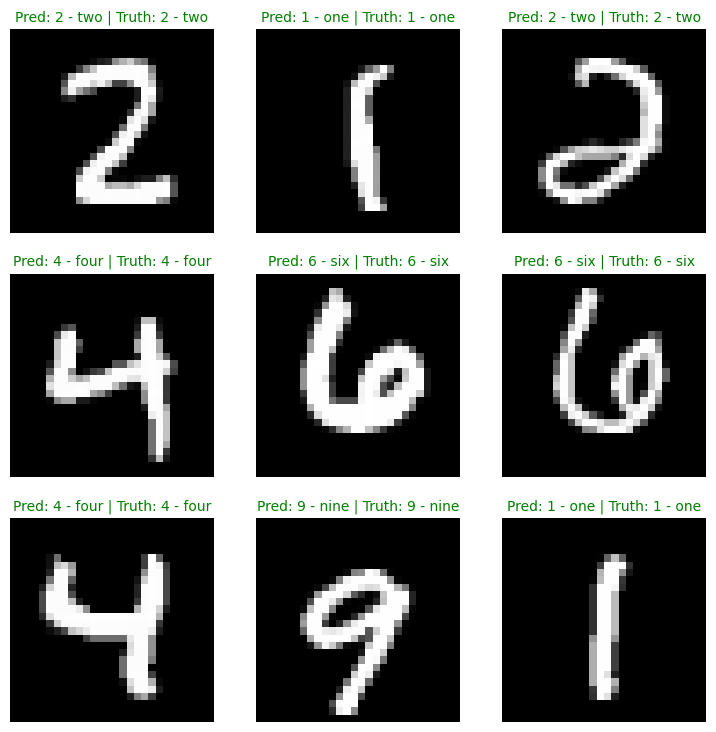

In [22]:
# Plot predictions
plt.figure(figsize=(9, 9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
  # Create a subplot
  plt.subplot(nrows, ncols, i+1)

  # Plot the target image
  plt.imshow(sample.squeeze(), cmap="gray")

  # Find the prediction label (in text form, e.g. "Sandal")
  pred_label = class_names[pred_labels[i]]

  # Get the truth label (in text form, e.g. "T-shirt")
  truth_label = class_names[test_labels[i]] 

  # Create the title text of the plot
  title_text = f"Pred: {pred_label} | Truth: {truth_label}"
  
  # Check for equality and change title colour accordingly
  if pred_label == truth_label:
      plt.title(title_text, fontsize=10, c="g") # green text if correct
  else:
      plt.title(title_text, fontsize=10, c="r") # red text if wrong
  plt.axis(False);

## 11. Plot a confusion matrix comparing your model's predictions to the truth labels.

In [23]:
# Import tqdm for progress bar
from tqdm.auto import tqdm

# 1. Make predictions with trained model
y_preds = []
model_0.eval()
with torch.inference_mode():
  for X, y in tqdm(test_dataloader, desc="Making predictions"):
    # Send data and targets to target device
    X, y = X.to(device), y.to(device)
    # Do the forward pass
    y_logit = model_0(X)
    # Turn predictions from logits -> prediction probabilities -> predictions labels
    y_pred = torch.softmax(y_logit, dim=1).argmax(dim=1) # note: perform softmax on the "logits" dimension, not "batch" dimension (in this case we have a batch size of 32, so can perform on dim=1)
    # Put predictions on CPU for evaluation
    y_preds.append(y_pred.cpu())
# Concatenate list of predictions into a tensor
y_pred_tensor = torch.cat(y_preds)

Making predictions: 100%|██████████| 313/313 [00:00<00:00, 900.64it/s]


In [24]:
# See if torchmetrics exists, if not, install it
try:
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")
    assert int(mlxtend.__version__.split(".")[1]) >= 19, "mlxtend verison should be 0.19.0 or higher"
except:
    !pip install -q torchmetrics -U mlxtend # <- Note: If you're using Google Colab, this may require restarting the runtime
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")

mlxtend version: 0.23.3


In [25]:
# Import mlxtend upgraded version
import mlxtend 
print(mlxtend.__version__)
assert int(mlxtend.__version__.split(".")[1]) >= 19 # should be version 0.19.0 or higher

0.23.3


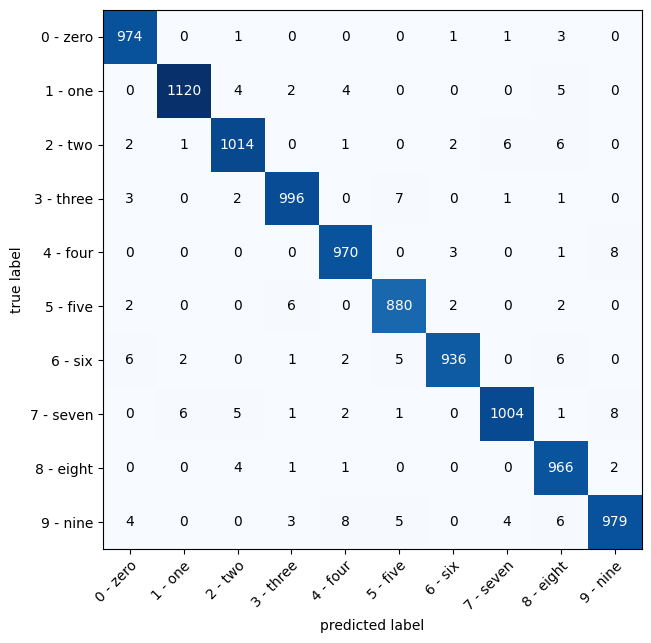

In [26]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# 2. Setup confusion matrix instance and compare predictions to targets
confmat = ConfusionMatrix(num_classes=len(class_names), task='multiclass')
confmat_tensor = confmat(preds=y_pred_tensor,
                         target=test_dataset.targets)

# 3. Plot the confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(), # matplotlib likes working with NumPy 
    class_names=class_names, # turn the row and column labels into class names
    figsize=(10, 7)
);

## 12. Create a random tensor of shape `[1, 3, 64, 64]` and pass it through a `nn.Conv2d()` layer with various hyperparameter settings (these can be any settings you choose), what do you notice if the `kernel_size` parameter goes up and down?

In [27]:
tensor_A = torch.rand([1, 3, 64, 64])

for kn_size in range(1, 5):
    tensor_A_logits = nn.Conv2d(in_channels=3, out_channels=10, kernel_size=kn_size)(tensor_A)
    print(tensor_A.shape, tensor_A_logits.shape)

torch.Size([1, 3, 64, 64]) torch.Size([1, 10, 64, 64])
torch.Size([1, 3, 64, 64]) torch.Size([1, 10, 63, 63])
torch.Size([1, 3, 64, 64]) torch.Size([1, 10, 62, 62])
torch.Size([1, 3, 64, 64]) torch.Size([1, 10, 61, 61])


## 13. Use a model similar to the trained `model_2` from notebook 03 to make predictions on the test [`torchvision.datasets.FashionMNIST`](https://pytorch.org/vision/main/generated/torchvision.datasets.FashionMNIST.html) dataset. 
* Then plot some predictions where the model was wrong alongside what the label of the image should've been. 
* After visualing these predictions do you think it's more of a modelling error or a data error? 
* As in, could the model do better or are the labels of the data too close to each other (e.g. a "Shirt" label is too close to "T-shirt/top")?

In [29]:
train_data = torchvision.datasets.FashionMNIST(train=True,
                                               root="data",
                                               download=True,
                                               transform=ToTensor())
test_data = torchvision.datasets.FashionMNIST(train=False,
                                              root="data",
                                              download=True,
                                              transform=ToTensor())

train_dataloader_fashion = DataLoader(train_data, batch_size=32, shuffle=True)
test_dataloader_fashion = DataLoader(test_data, batch_size=32, shuffle=False)

class_names_fashion = train_data.classes

model_1 = TinyVGG(input_shape=1,
                    hidden_units=10,
                    output_shape=len(class_names_fashion))

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_1.parameters(), lr=0.1)

from tqdm.auto import tqdm
from timeit import default_timer as timer
from helper_functions import accuracy_fn

## Train model on GPU
train_time_start_on_gpu = timer()

# Train step
epochs = 20

for epoch in tqdm(range(epochs)):
    print(f"Epoch:\n--------")
    train_step(model=model_1,
               data_loader=train_dataloader_fashion,
               loss_fn=loss_fn,
               optimizer=optimizer,
               accuracy_fn=accuracy_fn,
               device=device)
    test_step(model=model_1,
              data_loader=test_dataloader_fashion,
              loss_fn=loss_fn,
              optimizer=optimizer,
              accuracy_fn=accuracy_fn,
              device=device)

train_time_end_on_gpu = timer()
total_train_time_model_1 = print_train_time(start=train_time_start_on_gpu,
                                            end=train_time_end_on_gpu,
                                            device=device)


  0%|          | 0/20 [00:00<?, ?it/s]

Epoch:
--------
Train loss: 0.5507183074951172 | Train accuracy: 79.97166666666666


  5%|▌         | 1/20 [00:03<01:12,  3.80s/it]

Test loss: 0.3878692090511322 | Test accuracy: 86.27196485623003
Epoch:
--------
Train loss: 0.34650665521621704 | Train accuracy: 87.49333333333334


 10%|█         | 2/20 [00:07<01:09,  3.85s/it]

Test loss: 0.3623892068862915 | Test accuracy: 87.03075079872204
Epoch:
--------
Train loss: 0.31314101815223694 | Train accuracy: 88.735


 15%|█▌        | 3/20 [00:11<01:05,  3.87s/it]

Test loss: 0.33988720178604126 | Test accuracy: 88.22883386581469
Epoch:
--------
Train loss: 0.2927738428115845 | Train accuracy: 89.365


 20%|██        | 4/20 [00:15<01:03,  3.95s/it]

Test loss: 0.2960975170135498 | Test accuracy: 89.05750798722045
Epoch:
--------
Train loss: 0.27929699420928955 | Train accuracy: 89.78166666666667


 25%|██▌       | 5/20 [00:19<00:59,  3.94s/it]

Test loss: 0.29009512066841125 | Test accuracy: 89.45686900958466
Epoch:
--------
Train loss: 0.269944965839386 | Train accuracy: 90.24833333333333


 30%|███       | 6/20 [00:23<00:54,  3.92s/it]

Test loss: 0.2921832501888275 | Test accuracy: 89.21725239616613
Epoch:
--------
Train loss: 0.2644384503364563 | Train accuracy: 90.33333333333333


 35%|███▌      | 7/20 [00:27<00:50,  3.91s/it]

Test loss: 0.29190564155578613 | Test accuracy: 89.40694888178913
Epoch:
--------
Train loss: 0.25757285952568054 | Train accuracy: 90.60333333333334


 40%|████      | 8/20 [00:31<00:46,  3.86s/it]

Test loss: 0.2832355499267578 | Test accuracy: 89.73642172523962
Epoch:
--------
Train loss: 0.25209909677505493 | Train accuracy: 90.655


 45%|████▌     | 9/20 [00:34<00:42,  3.83s/it]

Test loss: 0.2883989214897156 | Test accuracy: 89.65654952076677
Epoch:
--------
Train loss: 0.24655719101428986 | Train accuracy: 90.97166666666666


 50%|█████     | 10/20 [00:38<00:38,  3.82s/it]

Test loss: 0.2754810154438019 | Test accuracy: 89.99600638977635
Epoch:
--------
Train loss: 0.24417181313037872 | Train accuracy: 91.05166666666666


 55%|█████▌    | 11/20 [00:42<00:34,  3.83s/it]

Test loss: 0.2970861792564392 | Test accuracy: 88.73801916932908
Epoch:
--------
Train loss: 0.23990260064601898 | Train accuracy: 91.22166666666666


 60%|██████    | 12/20 [00:46<00:30,  3.85s/it]

Test loss: 0.2811245620250702 | Test accuracy: 89.56669329073482
Epoch:
--------
Train loss: 0.23826612532138824 | Train accuracy: 91.38833333333334


 65%|██████▌   | 13/20 [00:50<00:27,  3.88s/it]

Test loss: 0.28848159313201904 | Test accuracy: 89.3370607028754
Epoch:
--------
Train loss: 0.2337368130683899 | Train accuracy: 91.41833333333334


 70%|███████   | 14/20 [00:54<00:23,  3.87s/it]

Test loss: 0.2898978888988495 | Test accuracy: 89.49680511182109
Epoch:
--------
Train loss: 0.2340874820947647 | Train accuracy: 91.34833333333333


 75%|███████▌  | 15/20 [00:58<00:19,  3.89s/it]

Test loss: 0.3192077577114105 | Test accuracy: 88.37859424920129
Epoch:
--------
Train loss: 0.22916465997695923 | Train accuracy: 91.45666666666666


 80%|████████  | 16/20 [01:02<00:15,  3.90s/it]

Test loss: 0.27415698766708374 | Test accuracy: 90.0758785942492
Epoch:
--------
Train loss: 0.22670982778072357 | Train accuracy: 91.65166666666667


 85%|████████▌ | 17/20 [01:06<00:11,  3.95s/it]

Test loss: 0.2878597676753998 | Test accuracy: 90.02595846645367
Epoch:
--------
Train loss: 0.22331319749355316 | Train accuracy: 91.79666666666667


 90%|█████████ | 18/20 [01:10<00:07,  3.94s/it]

Test loss: 0.2925250232219696 | Test accuracy: 89.1473642172524
Epoch:
--------
Train loss: 0.22344203293323517 | Train accuracy: 91.84833333333333


 95%|█████████▌| 19/20 [01:13<00:03,  3.89s/it]

Test loss: 0.26482564210891724 | Test accuracy: 90.58506389776358
Epoch:
--------
Train loss: 0.22261635959148407 | Train accuracy: 91.745


100%|██████████| 20/20 [01:17<00:00,  3.88s/it]

Test loss: 0.2785401940345764 | Test accuracy: 90.02595846645367
Train time on cuda: 77.687 seconds


In [33]:
# Import tqdm for progress bar
from tqdm.auto import tqdm

# 1. Make predictions with trained model
y_preds = []
model_1.eval()
with torch.inference_mode():
  for X, y in tqdm(test_dataloader_fashion, desc="Making predictions"):
    # Send data and targets to target device
    X, y = X.to(device), y.to(device)
    # Do the forward pass
    y_logit = model_1(X)
    # Turn predictions from logits -> prediction probabilities -> predictions labels
    y_pred = torch.softmax(y_logit, dim=1).argmax(dim=1) # note: perform softmax on the "logits" dimension, not "batch" dimension (in this case we have a batch size of 32, so can perform on dim=1)
    # Put predictions on CPU for evaluation
    y_preds.append(y_pred.cpu())
# Concatenate list of predictions into a tensor
y_pred_tensor = torch.cat(y_preds)


Making predictions: 100%|██████████| 313/313 [00:00<00:00, 870.31it/s]


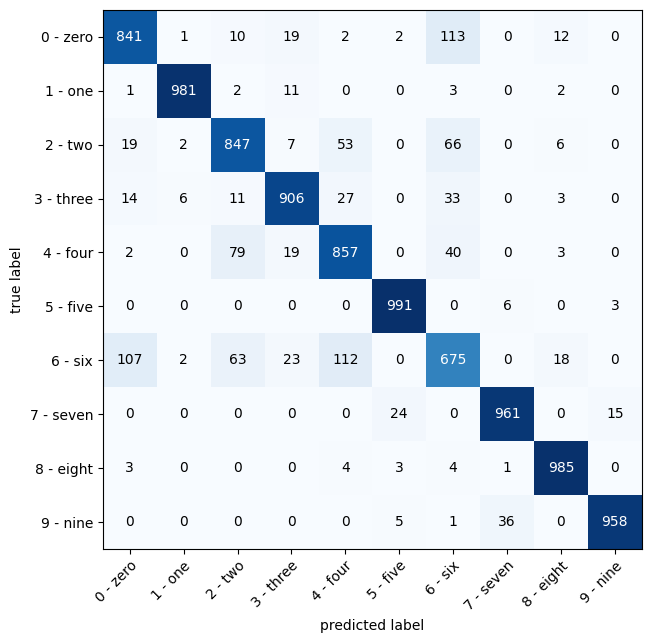

In [34]:

from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# 2. Setup confusion matrix instance and compare predictions to targets
confmat = ConfusionMatrix(num_classes=len(class_names), task='multiclass')
confmat_tensor = confmat(preds=y_pred_tensor,
                         target=test_data.targets)

# 3. Plot the confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(), # matplotlib likes working with NumPy 
    class_names=class_names, # turn the row and column labels into class names
    figsize=(10, 7)
)